In [1]:
%matplotlib inline


# Plotting data from a file

Plotting CPU usage values


In [2]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from glob import glob
from sklearn.metrics import auc

Load the data
============

In [3]:
def load_cpu_data_from_csv(user_offset=0,skip_offset_for_mode='default'):
    task_tot_cpu_filenames = glob('taskmanager_System_CPU_Usage_*.csv')
    n_schedule_types = len(task_tot_cpu_filenames)
    task_tot_cpu_data = [None] * n_schedule_types
    for idx,f in enumerate(task_tot_cpu_filenames):
        schedule_mode = f.split("_")[4]
        idx = 0
        if schedule_mode == 'traffic-based':
            idx = 1
        elif schedule_mode == 'drl-based':
            schedule_mode = 'Q-actor-critic'
            idx = 2
        elif schedule_mode == 'adaptive':
            schedule_mode = 'actor-critic-NN'
            idx = 3
        print("Reading " + f + " into index " + str(idx))
        task_tot_cpu_data[idx] = pd.read_csv(f)
        task_tot_cpu_data[idx]['schedule_mode'] = schedule_mode        
    
    for cpu_usage_dataset in task_tot_cpu_data:
        start_offset = 0
        if cpu_usage_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(cpu_usage_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        cpu_usage_dataset['time'] = pd.to_datetime(cpu_usage_dataset['time'], unit='ns', utc=True)
        cpu_usage_dataset['rel_time'] = round((cpu_usage_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        cpu_usage_dataset['formatted_time'] = cpu_usage_dataset['time'].dt.strftime("%H:%M:%S")
        
    # Read individual CPU data    
    individual_cpu_filenames = glob('jobmanager_System_CPU_UsageCPU*.csv')
    individual_cpu_data = pd.DataFrame()
    schedule_modes = []
    for idx, f in enumerate(individual_cpu_filenames):
        individual_cpu_dataset = pd.read_csv(f)
        schedule_mode = f.split("_")[4]
        if schedule_mode == 'adaptive':
            schedule_mode = 'actor-critic-NN'
        elif schedule_mode == 'drl-based':
            schedule_mode = 'Q-actor-critic'
        individual_cpu_dataset['schedule_mode'] = schedule_mode
        schedule_modes.append(schedule_mode)

        start_time = pd.to_datetime(individual_cpu_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        individual_cpu_dataset['time'] = pd.to_datetime(individual_cpu_dataset['time'], unit='ns', utc=True)
        individual_cpu_dataset['rel_time'] = round((individual_cpu_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        individual_cpu_dataset['formatted_time'] = individual_cpu_dataset['time'].dt.strftime("%H:%M:%S")
        
        cpu_id = individual_cpu_dataset.name.iloc[0].partition('taskmanager_System_CPU_UsageCPU')[-1]
        cpu_usage_name = "CPU " + cpu_id.rjust(2,'0') + " Usage"
        individual_cpu_dataset['cpu_id'] = int(cpu_id)
        individual_cpu_dataset['cpu_usage_name'] = cpu_usage_name
        if individual_cpu_data.empty :
            individual_cpu_data = individual_cpu_dataset
        else:
            individual_cpu_data = individual_cpu_data.append(individual_cpu_dataset)
        
        
    return task_tot_cpu_data, individual_cpu_data, set(schedule_modes)

def load_operator_data_from_csv(user_offset=0, skip_offset_for_mode='default'):
    task_operator_cpu_filenames = glob('taskmanager_job_task_operator_currentCpuUsage_*.csv')
    n_schedule_types = len(task_operator_cpu_filenames)
    task_operator_cpu_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_cpu_filenames):
        schedule_mode = f.split("_")[5]
        idx = 0
        if schedule_mode == 'traffic-based':
            idx = 1
        elif schedule_mode == 'drl-based':
            schedule_mode = 'Q-actor-critic'
            idx = 2
        elif schedule_mode == 'adaptive':
            schedule_mode = 'actor-critic-NN'
            idx = 3
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_cpu_data[idx] = pd.read_csv(f)
        task_operator_cpu_data[idx]['schedule_mode'] = schedule_mode
    
    for operator_cpu_dataset in task_operator_cpu_data:
        start_offset = 0
        if operator_cpu_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_cpu_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_cpu_dataset['time'] = pd.to_datetime(operator_cpu_dataset['time'], unit='ns', utc=True)
        operator_cpu_dataset['rel_time'] = round((operator_cpu_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_cpu_dataset['formatted_time'] = operator_cpu_dataset['time'].dt.strftime("%H:%M:%S")
        
    task_operator_rec_in_filenames = glob('taskmanager_job_task_operator_numRecordsInPerSecond_*.csv')
    task_operator_rec_in_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_rec_in_filenames):
        schedule_mode = f.split("_")[5]
        idx = 0
        if schedule_mode == 'traffic-based':
            idx = 1
        elif schedule_mode == 'drl-based':
            schedule_mode = 'Q-actor-critic'
            idx = 2
        elif schedule_mode == 'adaptive':
            schedule_mode = 'actor-critic-NN'
            idx = 3
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_rec_in_data[idx] = pd.read_csv(f)
        task_operator_rec_in_data[idx]['schedule_mode'] = schedule_mode        
    
    for operator_rec_in_dataset in task_operator_rec_in_data:
        start_offset = 0
        if operator_rec_in_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_rec_in_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_rec_in_dataset['time'] = pd.to_datetime(operator_rec_in_dataset['time'], unit='ns', utc=True)
        operator_rec_in_dataset['rel_time'] = round((operator_rec_in_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_rec_in_dataset['formatted_time'] = operator_rec_in_dataset['time'].dt.strftime("%H:%M:%S")

    task_operator_rec_out_filenames = glob('taskmanager_job_task_operator_numRecordsOutPerSecond_*.csv')
    task_operator_rec_out_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_rec_out_filenames):
        schedule_mode = f.split("_")[5]
        idx = 0
        if schedule_mode == 'traffic-based':
            idx = 1
        elif schedule_mode == 'drl-based':
            schedule_mode = 'Q-actor-critic'
            idx = 2
        elif schedule_mode == 'adaptive':
            schedule_mode = 'actor-critic-NN'
            idx = 3
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_rec_out_data[idx] = pd.read_csv(f)
        task_operator_rec_out_data[idx]['schedule_mode'] = schedule_mode        
    
    for operator_rec_out_dataset in task_operator_rec_out_data:
        start_offset = 0
        if operator_rec_out_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_rec_out_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_rec_out_dataset['time'] = pd.to_datetime(operator_rec_out_dataset['time'], unit='ns', utc=True)
        operator_rec_out_dataset['rel_time'] = round((operator_rec_out_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_rec_out_dataset['formatted_time'] = operator_rec_out_dataset['time'].dt.strftime("%H:%M:%S")

    task_operator_rec_proc_filenames = glob('taskmanager_job_task_operator_numRecordsProcessedPerSecond_*.csv')
    task_operator_rec_proc_data = [None] * n_schedule_types
    for idx,f in enumerate(task_operator_rec_proc_filenames):
        schedule_mode = f.split("_")[5]
        idx = 0
        if schedule_mode == 'traffic-based':
            idx = 1
        elif schedule_mode == 'drl-based':
            schedule_mode = 'Q-actor-critic'
            idx = 2
        elif schedule_mode == 'adaptive':
            schedule_mode = 'actor-critic-NN'
            idx = 3
        print("Reading " + f + " into index " + str(idx) + " with schedule mode " + schedule_mode)
        task_operator_rec_proc_data[idx] = pd.read_csv(f)
        task_operator_rec_proc_data[idx]['schedule_mode'] = schedule_mode
    
    for operator_rec_proc_dataset in task_operator_rec_proc_data:
        start_offset = 0
        if operator_rec_proc_dataset['schedule_mode'].any() != skip_offset_for_mode:
            start_offset = user_offset
        start_time = pd.to_datetime(operator_rec_proc_dataset.iloc[start_offset]['time'], unit='ns', utc=True)
        operator_rec_proc_dataset['time'] = pd.to_datetime(operator_rec_proc_dataset['time'], unit='ns', utc=True)
        operator_rec_proc_dataset['rel_time'] = round((operator_rec_proc_dataset['time'] -
                                                   start_time).dt.total_seconds() / 60.0, 2)
        operator_rec_proc_dataset['formatted_time'] = operator_rec_proc_dataset['time'].dt.strftime("%H:%M:%S")
        
    return task_operator_cpu_data, task_operator_rec_in_data, \
                task_operator_rec_out_data, task_operator_rec_proc_data

In [28]:
task_tot_cpu_data, individual_cpu_data, schedule_modes  = load_cpu_data_from_csv(5)
task_tot_cpu_data[1].head(20)

Reading taskmanager_System_CPU_Usage_default_2021_03_22.csv into index 0
Reading taskmanager_System_CPU_Usage_traffic-based_2021_03_22.csv into index 1


,name,time,host,tm_id,value,schedule_mode,rel_time,formatted_time
0,taskmanager_System_CPU_Usage,2021-03-22 16:27:20.576000+00:00,192.168.152.103,ec2dcbb6bcd8d6304342878fb78ee21e,45.0,traffic-based,-0.51,16:27:20
1,taskmanager_System_CPU_Usage,2021-03-22 16:27:20.723000+00:00,192.168.152.204,c971746635ee6dbad140d7379698b9a0,98.0,traffic-based,-0.51,16:27:20
2,taskmanager_System_CPU_Usage,2021-03-22 16:27:21.110000+00:00,192.168.152.205,ef2ba02718b6d5a2fb5cf68c3083b5db,22.0,traffic-based,-0.50,16:27:21
3,taskmanager_System_CPU_Usage,2021-03-22 16:27:50.675000+00:00,192.168.152.103,ec2dcbb6bcd8d6304342878fb78ee21e,246.0,traffic-based,-0.01,16:27:50
4,taskmanager_System_CPU_Usage,2021-03-22 16:27:50.843000+00:00,192.168.152.204,c971746635ee6dbad140d7379698b9a0,335.0,traffic-based,-0.01,16:27:50
5,taskmanager_System_CPU_Usage,2021-03-22 16:27:51.261000+00:00,192.168.152.205,ef2ba02718b6d5a2fb5cf68c3083b5db,97.0,traffic-based,0.00,16:27:51
6,taskmanager_System_CPU_Usage,2021-03-22 16:28:20.890000+00:00,192.168.152.103,ec2dcbb6bcd8d6304342878fb78ee21e,346.0,traffic-based,0.49,16:28:20
7,taskmanager_System_CPU_Usage,2021-03-22 16:28:21.013000+00:00,192.168.152.204,c971746635ee6dbad140d7379698b9a0,364.0,traffic-based,0.50,16:28:21
8,taskmanager_System_CPU_Usage,2021-03-22 16:28:21.440000+00:00,192.168.152.205,ef2ba02718b6d5a2fb5cf68c3083b5db,97.0,traffic-based,0.50,16:28:21
9,taskmanager_System_CPU_Usage,2021-03-22 16:28:51.025000+00:00,192.168.152.103,ec2dcbb6bcd8d6304342878fb78ee21e,340.0,traffic-based,1.00,16:28:51


Task Manager CPU Usage
-----------



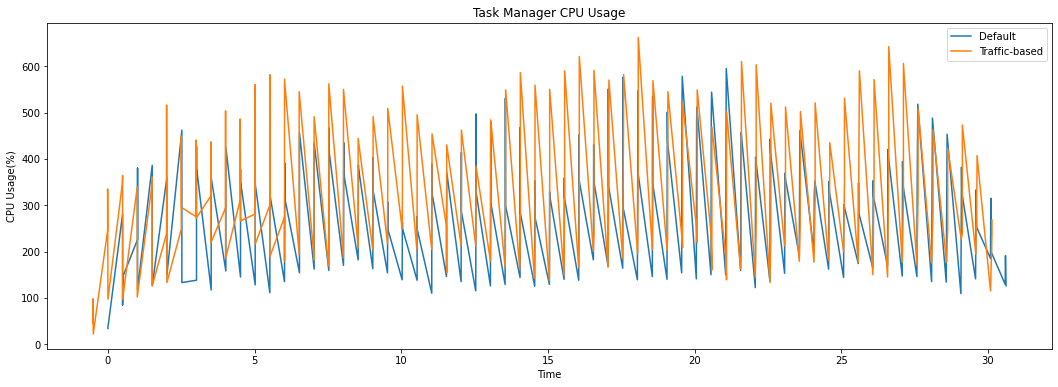

In [29]:
fig,ax = plt.subplots(figsize=(18,6))

ax.plot(task_tot_cpu_data[0]['rel_time'], task_tot_cpu_data[0]['value'])
ax.plot(task_tot_cpu_data[1]['rel_time'], task_tot_cpu_data[1]['value'])
#ax.plot(task_tot_cpu_data[2]['rel_time'], task_tot_cpu_data[2]['value'])
#ax.plot(task_tot_cpu_data[3]['rel_time'], task_tot_cpu_data[3]['value'])

ax.set(xlabel='Time', ylabel='CPU Usage(%)',
       title='Task Manager CPU Usage')
ax.tick_params(axis='x', rotation=0)
ax.legend(['Default','Traffic-based','Q Actor-Critic','Actor-Critic NN'], loc='upper right')
plt.savefig('task_manager_cpu_usage.png')
plt.show()

In [30]:
individual_cpu_data.head()

,name,time,value,schedule_mode,rel_time,formatted_time,cpu_id,cpu_usage_name
0,taskmanager_System_CPU_UsageCPU23,2021-03-22 15:52:39.127000+00:00,0.181818,default,-0.51,15:52:39,23,CPU 23 Usage
1,taskmanager_System_CPU_UsageCPU23,2021-03-22 15:52:39.226000+00:00,0.000000,default,-0.51,15:52:39,23,CPU 23 Usage
2,taskmanager_System_CPU_UsageCPU23,2021-03-22 15:52:39.558000+00:00,0.182482,default,-0.50,15:52:39,23,CPU 23 Usage
3,taskmanager_System_CPU_UsageCPU23,2021-03-22 15:53:09.225000+00:00,2.935780,default,-0.01,15:53:09,23,CPU 23 Usage
4,taskmanager_System_CPU_UsageCPU23,2021-03-22 15:53:09.349000+00:00,14.442413,default,-0.01,15:53:09,23,CPU 23 Usage


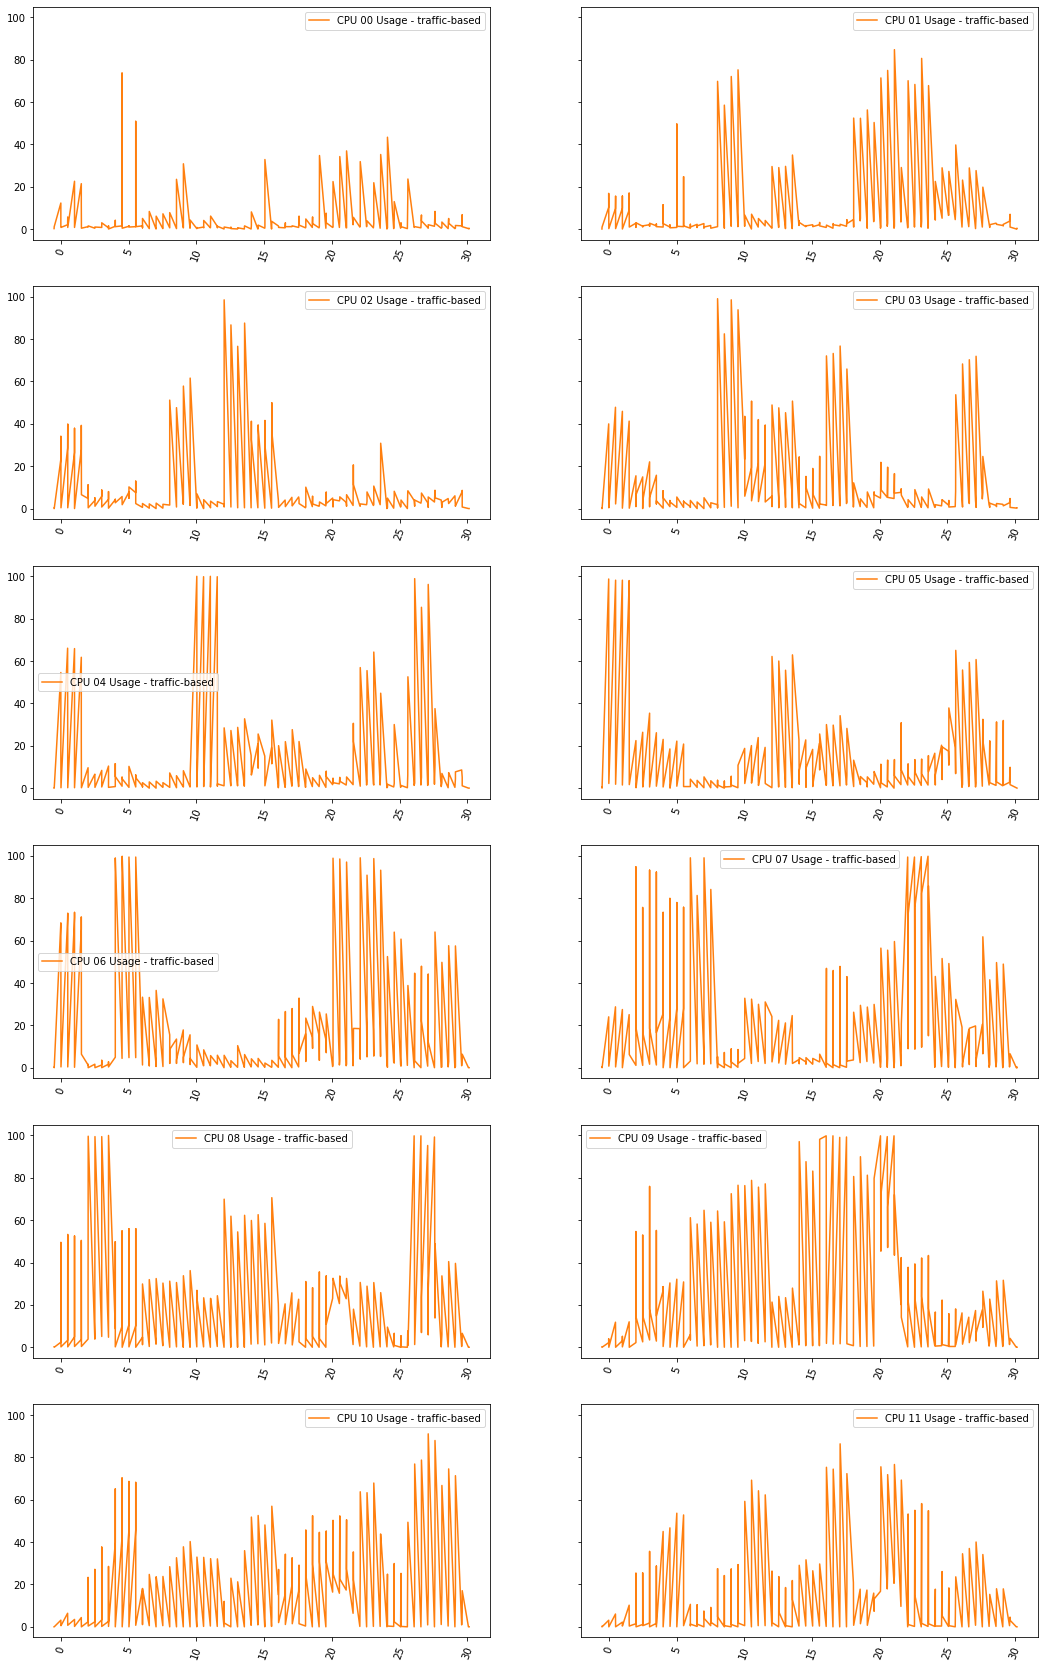

In [31]:
fig, axes = plt.subplots(6,2, figsize=(18,30), sharey=True)
loc_placement = 'best'
x_tick_rotation = 70

for mode_idx, mode_name in enumerate(schedule_modes):
    if mode_name == 'default':
        continue
    mode_cpu_data = individual_cpu_data.loc[individual_cpu_data['schedule_mode'] == mode_name]
    for idx, ax in enumerate(axes):
        specific_cpu_data_1 = mode_cpu_data.loc[mode_cpu_data['cpu_id'] == idx * 2]
        specific_cpu_data_2 = mode_cpu_data.loc[mode_cpu_data['cpu_id'] == (idx * 2 + 1)]

        label_1 = specific_cpu_data_1.iloc[0]['cpu_usage_name'] + " - " + mode_name
        label_2 = specific_cpu_data_2.iloc[0]['cpu_usage_name'] + " - " + mode_name
        
        ax[0].plot(specific_cpu_data_1['rel_time'], specific_cpu_data_1['value'], 
                   'C' + str(mode_idx),label=label_1)
        ax[0].tick_params(axis='x', rotation=x_tick_rotation )
        ax[0].legend(loc=loc_placement)

        ax[1].plot(specific_cpu_data_2['rel_time'], specific_cpu_data_2['value'], 
                   'C' + str(mode_idx),label=label_2)
        ax[1].tick_params(axis='x', rotation=x_tick_rotation)
        ax[1].legend(loc=loc_placement)
    
plt.savefig('cpu_usage_metrics.png')

In [32]:
t_op_cpu_use, t_op_rec_in, t_op_rec_out, t_op_rec_proc = load_operator_data_from_csv(220)

#t_op_cpu_use[0] = t_op_cpu_use[0].loc[~t_op_cpu_use[0]['operator_name'].isin(['Sink: count-sink','word-count'])]

for operator_cpu_usage in t_op_cpu_use:
    drop_index = operator_cpu_usage[operator_cpu_usage['operator_name'].isin(['Sink: count-sink',
                                                                              'word-count'])].index
    operator_cpu_usage.drop(drop_index, inplace=True)
    operator_cpu_usage['temp_col'] = operator_cpu_usage['operator_name'].str.partition(":")[2]
    operator_cpu_usage.loc[operator_cpu_usage['temp_col'] != '', ['operator_name']] = \
                                                                operator_cpu_usage['temp_col']
    operator_cpu_usage['formatted_id'] = operator_cpu_usage['operator_name'] + \
        "-" + operator_cpu_usage['subtask_index'].astype(str)
    operator_cpu_usage.drop(columns=['name','subtask_index','temp_col'], inplace=True)
    operator_cpu_usage['value'] = (operator_cpu_usage['value'] / 1000000000.0).round(3)

operator_ids = t_op_cpu_use[0].formatted_id.unique()
print(operator_ids)
    
for operator_records_in  in t_op_rec_in:
    drop_index = operator_records_in[operator_records_in['operator_name'].isin(
        ['word-count -> Sink: count-sink'])].index
    operator_records_in.drop(drop_index, inplace=True)
    operator_records_in.loc[operator_records_in['operator_name'].str.partition(":")[2] != '', 
                             ['operator_name']] = operator_records_in['operator_name'].str.partition(":")[2]
    operator_records_in['formatted_id'] = operator_records_in['operator_name'] + \
        "-" + operator_records_in['subtask_index'].astype(str)
    operator_records_in.drop(columns=['name','subtask_index'], inplace=True)

for operator_records_out  in t_op_rec_out: 
    drop_index = operator_records_out[operator_records_out['operator_name'].isin(['Sink: count-sink',
                                                                'word-count -> Sink: count-sink'])].index
    operator_records_out.drop(drop_index, inplace=True)
    operator_records_out.loc[operator_records_out['operator_name'].str.partition(":")[2] != '', 
                             ['operator_name']] = operator_records_out['operator_name'].str.partition(":")[2]
    operator_records_out['formatted_id'] = operator_records_out['operator_name'] + \
        "-" + operator_records_out['subtask_index'].astype(str)
    operator_records_out.drop(columns=['name','subtask_index'], inplace=True)

# t_op_cpu_use[3].loc[(t_op_cpu_use[3]['operator_name'] == 'Source: sentence-stream') &
#                     (t_op_cpu_use[3]['value'] != 0)].head(60)

t_op_rec_proc[1][['rel_time','rate']][210:240]

Reading taskmanager_job_task_operator_currentCpuUsage_traffic-based_2021_03_22.csv into index 1 with schedule mode traffic-based
Reading taskmanager_job_task_operator_currentCpuUsage_default_2021_03_22.csv into index 0 with schedule mode default
Reading taskmanager_job_task_operator_numRecordsInPerSecond_default_2021_03_22.csv into index 0 with schedule mode default
Reading taskmanager_job_task_operator_numRecordsInPerSecond_traffic-based_2021_03_22.csv into index 1 with schedule mode traffic-based
Reading taskmanager_job_task_operator_numRecordsOutPerSecond_default_2021_03_22.csv into index 0 with schedule mode default
Reading taskmanager_job_task_operator_numRecordsOutPerSecond_traffic-based_2021_03_22.csv into index 1 with schedule mode traffic-based
Reading taskmanager_job_task_operator_numRecordsProcessedPerSecond_traffic-based_2021_03_22.csv into index 1 with schedule mode traffic-based
Reading taskmanager_job_task_operator_numRecordsProcessedPerSecond_default_2021_03_22.csv into

,rel_time,rate
210,0.0,2411.333333
211,0.0,0.000000
212,0.0,0.000000
213,0.0,1205.666667
214,0.0,1205.666667
215,0.0,0.000000
216,0.0,0.000000
217,0.0,0.000000
218,0.0,0.000000
219,0.0,0.000000


In [33]:
grouped_operator_rec_in = []
grouped_operator_rec_out = []
grouped_operator_rec_proc = []

for operator_records_in  in t_op_rec_in:
    grouped_operator_rec_in.append(operator_records_in.groupby(['rel_time','schedule_mode',
                                                                'operator_name']).sum().reset_index())

for operator_records_out  in t_op_rec_out: 
    grouped_operator_rec_out.append(operator_records_out.groupby(['rel_time','schedule_mode',
                                                                  'operator_name']).sum().reset_index())

for operator_records_proc  in t_op_rec_proc: 
    grouped_operator_rec_proc.append(operator_records_proc.groupby(['rel_time',
                                                                    'schedule_mode']).sum().reset_index())
    
in_operator_names = grouped_operator_rec_in[0].operator_name.unique()
out_operator_names = grouped_operator_rec_out[0].operator_name.unique()
grouped_operator_rec_proc[2].head(50)

IndexError: list index out of range

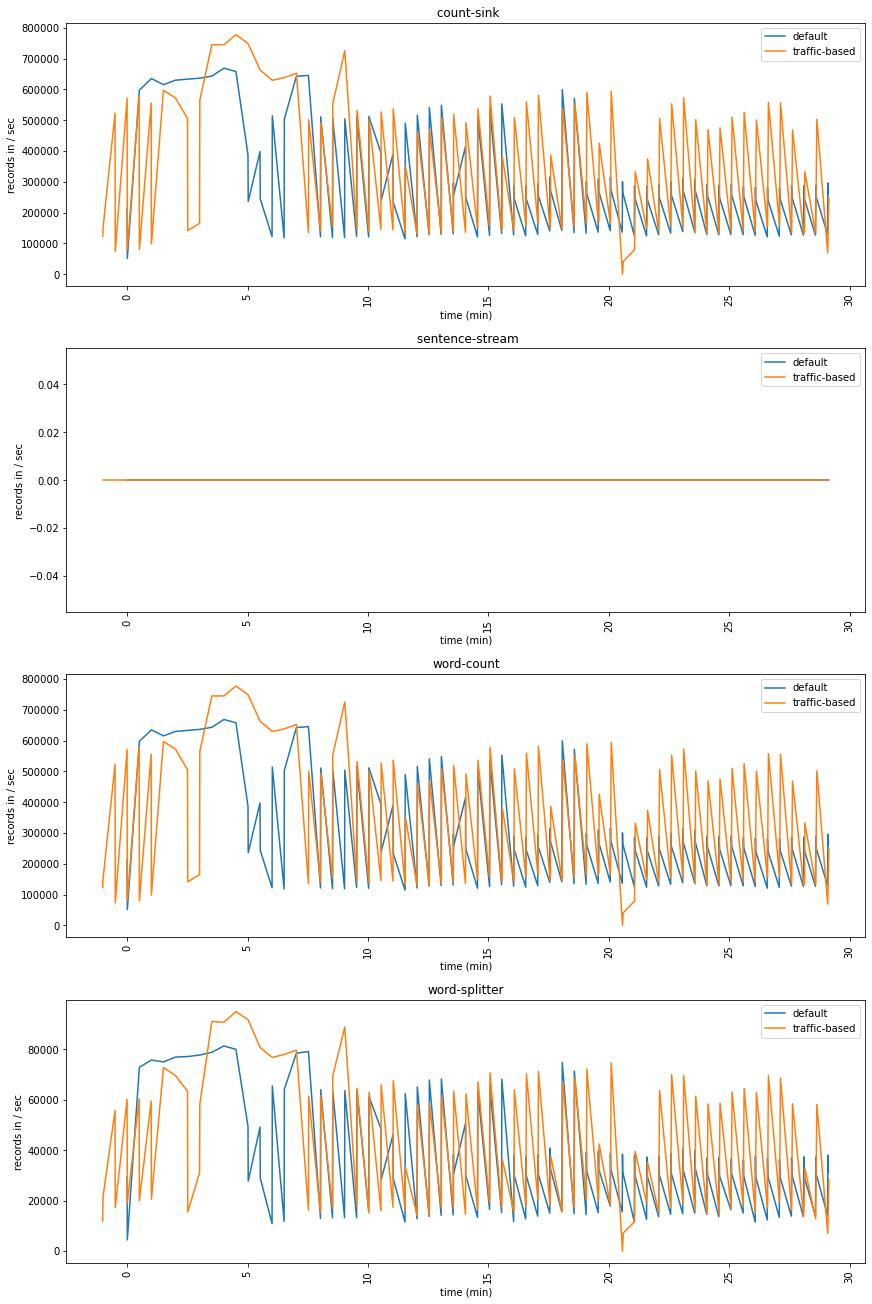

In [34]:
fig, axes = plt.subplots(len(in_operator_names), figsize=(12,18), constrained_layout=True)
x_tick_rotation = 90

for idx, ax in enumerate(axes):
    label_1 = in_operator_names[idx]
    ax.set_title(label_1)
    ax.tick_params(axis='x', rotation=x_tick_rotation )
    for grp_op_rec_in_dataset in grouped_operator_rec_in:
        specific_op_rec_in = grp_op_rec_in_dataset.loc[
            grp_op_rec_in_dataset['operator_name'] == in_operator_names[idx]]
        schedule_mode = specific_op_rec_in['schedule_mode'].unique()[0]
        ax.plot(specific_op_rec_in['rel_time'], specific_op_rec_in['rate'],
                label=schedule_mode)    
        ax.set_xlabel('time (min)')
        ax.set_ylabel('records in / sec')

        ax.legend(loc='best')

plt.savefig('operator_metrics_in.png')

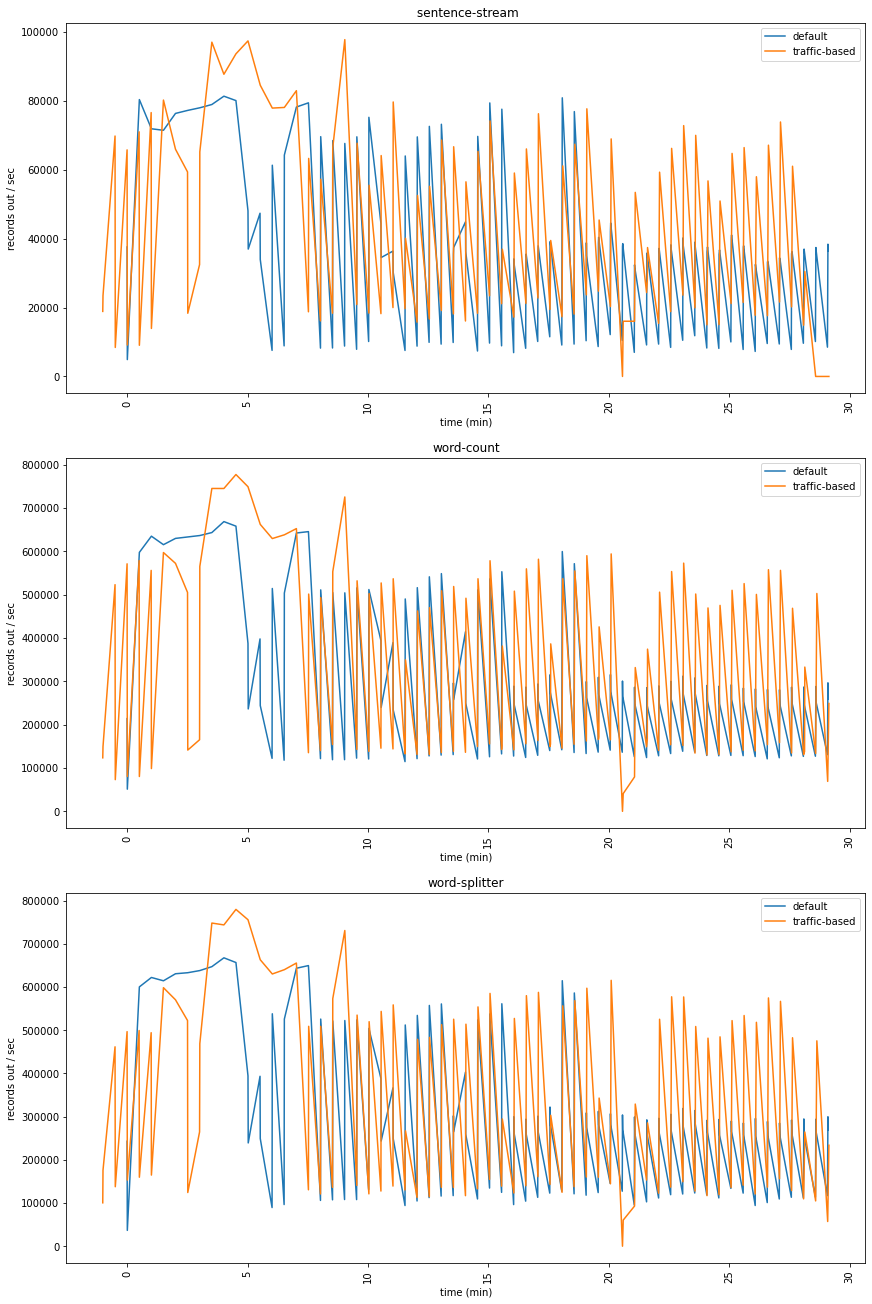

In [35]:
fig, axes = plt.subplots(len(out_operator_names), figsize=(12,18), constrained_layout=True)
loc_placement = 'upper right'
x_tick_rotation = 90

for idx, ax in enumerate(axes):
    label_1 = out_operator_names[idx]
    ax.set_title(label_1)
    ax.tick_params(axis='x', rotation=x_tick_rotation )
    for grp_op_rec_out_dataset in grouped_operator_rec_out:
        specific_op_rec_out = grp_op_rec_out_dataset.loc[
        grp_op_rec_out_dataset['operator_name'] == out_operator_names[idx]]
        schedule_mode = specific_op_rec_out['schedule_mode'].unique()[0]
        ax.plot(specific_op_rec_out['rel_time'], specific_op_rec_out['rate'],
                label=schedule_mode)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records out / sec')
    ax.legend(loc='best')

plt.savefig('operator_metrics_out.png')

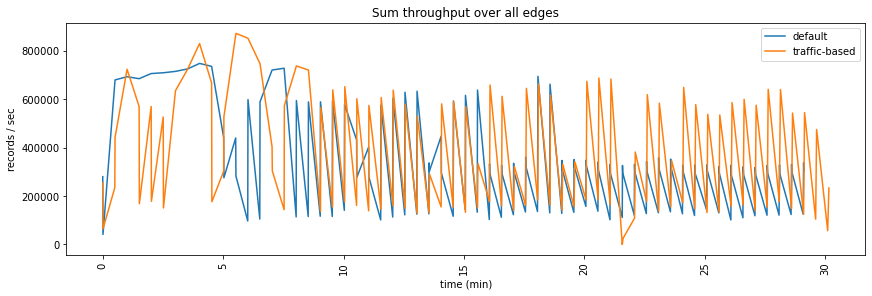

In [36]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
x_tick_rotation = 90

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.plot(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode)    

    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')

plt.savefig('operator_metrics_proc.pdf')

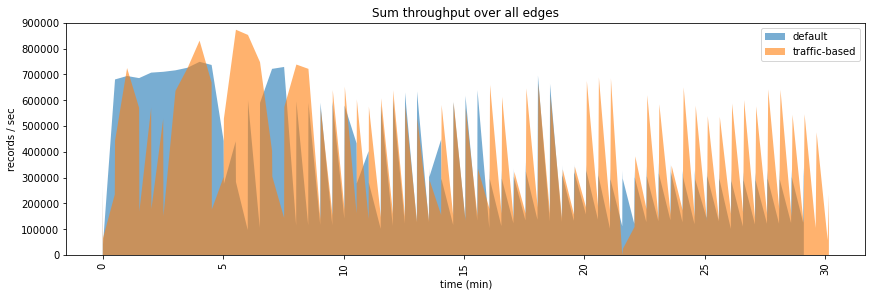

In [37]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
x_tick_rotation = 90

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(0,900000)

plt.savefig('operator_metrics_proc_short_y.png')
plt.savefig('operator_metrics_proc_short_y.pdf')

In [38]:
for grp_op_rec_proc_dataset in grouped_operator_rec_proc:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    print('AUC ({}) : \t{:,.2f}'.format(schedule_mode, 
                                 auc(grp_op_rec_proc_dataset['rel_time'],
                                     grp_op_rec_proc_dataset['rate'] * 60)))

AUC (default) : 	632,014,366.27
AUC (traffic-based) : 	735,921,121.47


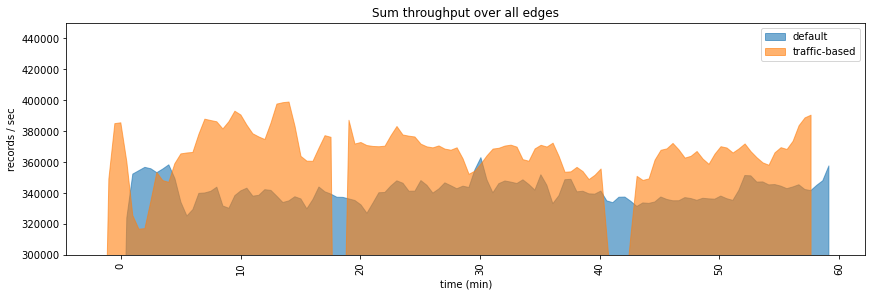

In [35]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
loc_placement = 'upper right'
x_tick_rotation = 90

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in [grouped_operator_rec_proc[i] for i in [0,1]]:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    mode_color = 'C0'
    if schedule_mode == 'traffic-based':
        mode_color = 'C1'
    elif schedule_mode == 'Q-actor-critic':
        mode_color = 'C2'
    elif schedule_mode == 'actor-critic-NN':
        mode_color = 'C3'
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6, color = mode_color)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(300000,450000)

plt.savefig('operator_metrics_proc_short_y_traffic_based.pdf')

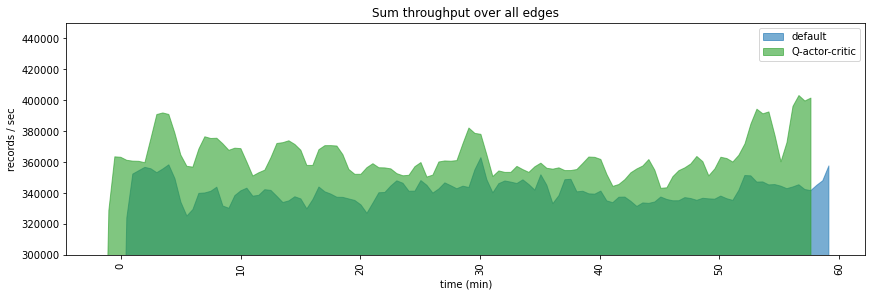

In [36]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
loc_placement = 'upper right'
x_tick_rotation = 90

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in [grouped_operator_rec_proc[i] for i in [0,2]]:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    mode_color = 'C0'
    if schedule_mode == 'traffic-based':
        mode_color = 'C1'
    elif schedule_mode == 'Q-actor-critic':
        mode_color = 'C2'
    elif schedule_mode == 'actor-critic-NN':
        mode_color = 'C3'
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6, color = mode_color)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(300000,450000)

plt.savefig('operator_metrics_proc_short_y_drl_based.pdf')

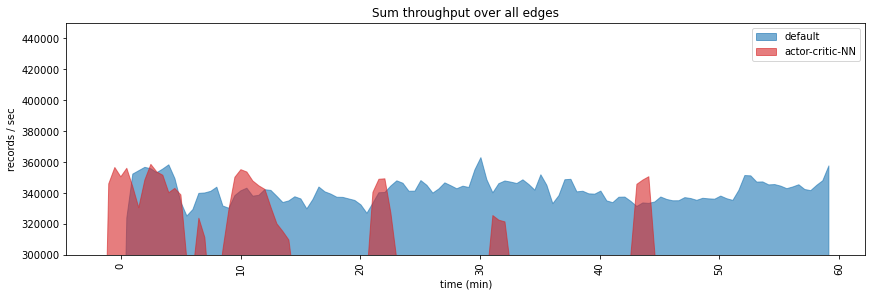

In [37]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
loc_placement = 'upper right'
x_tick_rotation = 90

ax.set_title('Sum throughput over all edges')
ax.tick_params(axis='x', rotation=x_tick_rotation )
for grp_op_rec_proc_dataset in [grouped_operator_rec_proc[i] for i in [0,3]]:
    schedule_mode = grp_op_rec_proc_dataset['schedule_mode'].unique()[0]
    mode_color = 'C0'
    if schedule_mode == 'traffic-based':
        mode_color = 'C1'
    elif schedule_mode == 'Q-actor-critic':
        mode_color = 'C2'
    elif schedule_mode == 'actor-critic-NN':
        mode_color = 'C3'
    ax.fill_between(grp_op_rec_proc_dataset['rel_time'], grp_op_rec_proc_dataset['rate'],
            label=schedule_mode, alpha=0.6, color = mode_color)    
    ax.set_xlabel('time (min)')
    ax.set_ylabel('records / sec')

ax.legend(loc='best')
plt.ylim(300000,450000)

plt.savefig('operator_metrics_proc_short_y_adaptive.pdf')

In [38]:
print("Done.")

Done.
